# Exercício

1. Carregue o arquivo FakeTweetBr.csv em um dataframe df. 

2. Crie uma função que leia um texto, remova stop_words e pontuações, além de colocar todas as letras em caixa baixa. O resultado deve ser uma lista de contendo textos lematizados.

3. Processe a função descrita anteriormente na coluna $text$ no dataframe df. E verifique as palavras mais frequentes. Faça um  𝑏𝑎𝑟𝑝𝑙𝑜𝑡 contendo a frequência de cada palavra

4. Crie um $corpus$ textual através da coluna $text$ e represente, para cada texto, sua forma vetorial através dos métodos $\textit{Bag of Words}$, $\textit{TF-IDF}$ e mais dois outros métodos baseado em Deep Learning (obter no  $hugging face$). 

5. Para cada método, quais palavras são mais correlacionadas com a palavra $fake$? Faça um  𝑏𝑎𝑟𝑝𝑙𝑜𝑡 contendo a correlação de cada palavra com a palavra $fake$ em ordem descrecente.  

6. Crie uma arvore (ou floresta) que represente a similaridades entre os textos. A arvore deve ser oriunda de um grafo onde os textos são conectados pela similaridade do cosseno entre eles. Crie uma arvore para cada método.  

7. Baseado na questão anterior, responda: O $\textit{closeness centrality}$ entre os métodos são proporcionais? Crie um correlograma para evidenciar a correlação de Pearson entre as centralidades dos textos para cada método. 







In [1]:
%pip install pandas matplotlib numpy seaborn scikit-learn tqdm

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install spacy
!python -m spacy download pt_core_news_sm

Note: you may need to restart the kernel to use updated packages.
zsh:1: command not found: python


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import string 
from tqdm import tqdm

import spacy
from spacy.lang.pt.stop_words import STOP_WORDS
from tqdm import tqdm

In [4]:
pln=spacy.load("pt_core_news_sm")
stop_words=STOP_WORDS
pontuacoes=string.punctuation
pontuacoes=pontuacoes+"..."+' '

In [5]:
def processamento(texto):
    texto=texto.lower()
    documento=pln(texto)
    lista1=[]
    for p in documento :
        #lista.append(p)
        lista1.append(p.lemma_)#lematização
    lista2=[]
    for p in lista1:
        if (p in stop_words)==False:
            lista2.append(p)
    lista3=[]
    for p in lista2:
        if (p in pontuacoes)==False:
            lista3.append(p)
            
        
    return lista3

In [6]:
df=pd.read_csv('FakeTweetBr.csv')

In [7]:
df

,Unnamed: 0,id,subject,text,classificacao,date,retweets,favorites,permalink
0,0,1.124513e+18,macaco marielle,Marielle >BANDIDOS Narco-traficantes-Milícias ...,fake,2019-05-04 0:16,0,0,https://twitter.com/MRTT_/status/1124513050218...
1,1,1.124049e+18,macaco marielle,"Bem, as últimas noticias a respeito disso que ...",fake,2019-05-02 17:33,0,0,https://twitter.com/EvaristoKlebber/status/112...
2,5,1.119295e+18,macaco marielle,@jornalnacional convivi com notícias da Mariel...,fake,2019-04-19 14:41,0,0,https://twitter.com/luiztemper/status/11192950...
3,10,1.114583e+18,macaco marielle,"O Cesari Battisti confessou seus crimes, a esq...",fake,2019-04-06 14:36,0,0,https://twitter.com/GrimoaldoL/status/11145825...
4,11,1.113246e+18,macaco marielle,[Agência Lupa] Verificamos: É falso que Thiago...,true,2019-04-02 22:04,1,0,https://twitter.com/antmarobel/status/11132459...
...,...,...,...,...,...,...,...,...,...
274,1345,1.118650e+18,jair time personalidade,"Por “ruptura com a corrupção”, apenas um brasi...",fake,2019-04-17 20:00,0,0,https://twitter.com/kohavitt/status/1118650345...
275,1405,1.090221e+18,jair time personalidade,"Pessoal, a revista americana TIME incluiu Jair...",fake,2019-01-29 9:10,2,1,https://twitter.com/alcamorim/status/109022062...
276,1480,1.073590e+18,jair time personalidade,QUE COMECE O MIMIMI DOS BOLSOBURROS. Jair Bols...,true,2018-12-14 11:47,0,1,https://twitter.com/jorgetemer/status/10735903...
277,1499,1.072787e+18,jair time personalidade,Circula nas redes sociais uma foto da capa da ...,true,2018-12-12 6:37,0,1,https://twitter.com/juidsonjoc/status/10727874...


3. Processe a função descrita anteriormente na coluna $text$ no dataframe df. E verifique as palavras mais frequentes. Faça um  𝑏𝑎𝑟𝑝𝑙𝑜𝑡 contendo a frequência de cada palavra

In [8]:
df['text_lematizado']=df['text'].apply(processamento)
df['text_lematizado']

0      [marielle, bandido, narco-traficantes-milícia,...
1      [noticia, respeito, de isso, verdadeiro, assas...
2      [@jornalnacional, convivi, notícia, de o, mari...
3      [Cesari, battisti, confessar, crime, esquerda,...
4      [agência, lupo, verificar, falso, thiago, maca...
                             ...                        
274    [“, ruptura, corrupção, ”, brasileiro, aparece...
275    [pessoal, revista, americano, time, incluir, j...
276    [começar, mimimi, de o, bolsoburro, jair, Bols...
277    [circular, em o, rede, social, foto, de o, cap...
278    [circular, por o, rede, social, publicação, af...
Name: text_lematizado, Length: 279, dtype: object

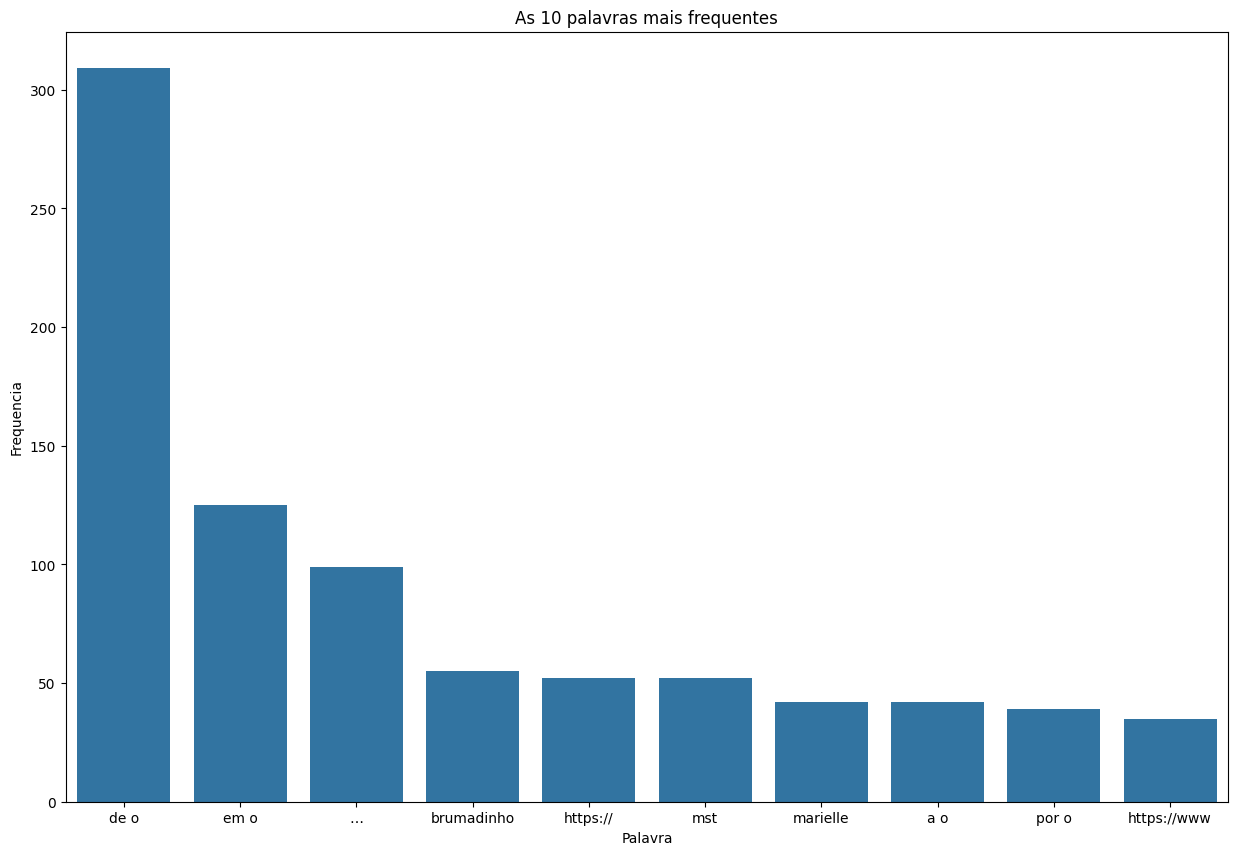

In [9]:
from collections import Counter

lista_palavras=[]
for i in df['text_lematizado']:
    for j in i:
        lista_palavras.append(j)
        
frequencia=Counter(lista_palavras)

df_frequencia=pd.DataFrame(frequencia.items(),columns=['Palavra','Frequencia'])

df_frequencia=df_frequencia.sort_values(by='Frequencia',ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(x='Palavra',y='Frequencia',data=df_frequencia.head(10))
plt.title('As 10 palavras mais frequentes')
plt.show()

4. Crie um $corpus$ textual através da coluna $text$ e represente, para cada texto, sua forma vetorial através dos métodos $\textit{Bag of Words}$, $\textit{TF-IDF}$ e mais dois outros métodos baseado em Deep Learning (obter no  $hugging face$). 

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

corpus=list(df['text_lematizado'].values)
corpus=[' '.join(i) for i in corpus]
corpus

['marielle bandido narco-traficantes-milícia pisar em o bola pcc mandante de o crime brazão de o pt organizaçãocriminoso assassinar thiago- Macaco midir acusar destruir sonhar grandepatr @ecantanhede @carvalhosamo @carlosbolsonaro @renovmidia @roxmo @sitefcs pic.twitter.com/8htb0vvmj8',
 'noticia respeito de isso verdadeiro assassino marielle acusado senão elemento codinome macaco colar bolsonaro x Marielle reveja fonte',
 '@jornalnacional convivi notícia de o marielle durante 3 quase dias parar reportagem descobrir matador thiago macaco negro favelar ligar a o tráfico bonemer vc supra sumo de o ridículo',
 'Cesari battisti confessar crime esquerda calar assassino marielle descobrir esquerda calar luladrão confessar esquerda meter língua macaco caju demagogo hipocrita fariseu',
 'agência lupo verificar falso thiago macaco identificar assassino marielle https:// piaui.folha.uol.com.br/lupa/2019/04/0 1 verificamos-marielle-preso-thiago …',
 'em o ar thiago macaco acusar por o polícia ass

In [11]:
#Bag of Words
cv=CountVectorizer()
X_bow=cv.fit_transform(corpus)
X_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:

#TF-IDF
tfidf=TfidfVectorizer()
X_tfidf=tfidf.fit_transform(corpus)
X_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
Y=df['classificacao'].apply(lambda x: 1 if x=='fake' else 0)
Y

0      1
1      1
2      1
3      1
4      0
      ..
274    1
275    1
276    0
277    0
278    0
Name: classificacao, Length: 279, dtype: int64

In [14]:
%pip install torch torchvision transformers ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [15]:
# from transformers import BertTokenizer, BertModel

# tokenizerBert=BertTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')
# modelBert=BertModel.from_pretrained('neuralmind/bert-base-portuguese-cased')

# tokensBert=tokenizerBert(corpus,return_tensors='pt',padding=True,truncation=True)
# outputBert=modelBert(**tokensBert)
# outputBert.last_hidden_state

In [16]:
# from transformers import AutoTokenizer, AutoModel

# model_name = "tubyneto/bertimbau"

# tokenizerBertimbau = AutoTokenizer.from_pretrained(model_name)
# modelBertimbau = AutoModel.from_pretrained(model_name)

# tokensBertimbau = tokenizerBertimbau(corpus, return_tensors='pt', padding=True, truncation=True)
# outputBertimbau = modelBertimbau(**tokensBertimbau)
# outputBertimbau.last_hidden_state



5. Para cada método, quais palavras são mais correlacionadas com a palavra $fake$? Faça um  𝑏𝑎𝑟𝑝𝑙𝑜𝑡 contendo a correlação de cada palavra com a palavra $fake$ em ordem descrecente.  

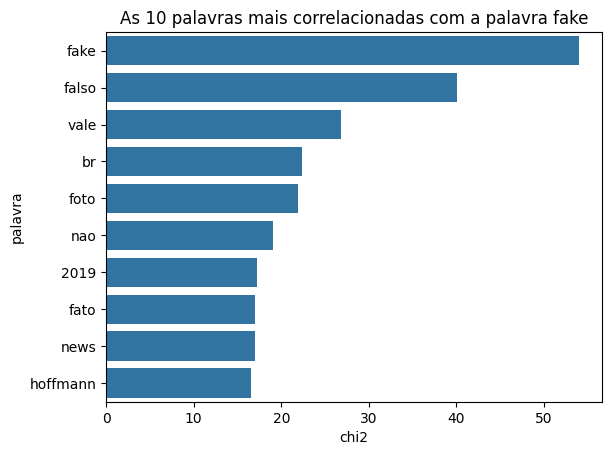

In [29]:
# 5. Para cada método, quais palavras são mais correlacionadas com a palavra $fake$? Faça um  𝑏𝑎𝑟𝑝𝑙𝑜𝑡 contendo a correlação de cada palavra com a palavra $fake$ em ordem descrecente.  
from sklearn.feature_selection import chi2

chi2score=chi2(X_bow,Y)[0]

df_chi2=pd.DataFrame(chi2score,columns=['chi2'])
df_chi2['palavra']=cv.get_feature_names_out()
df_chi2=df_chi2.sort_values(by='chi2',ascending=False)

sns.barplot(x='chi2',y='palavra',data=df_chi2.head(10))
plt.title('As 10 palavras mais correlacionadas com a palavra fake')
plt.show()


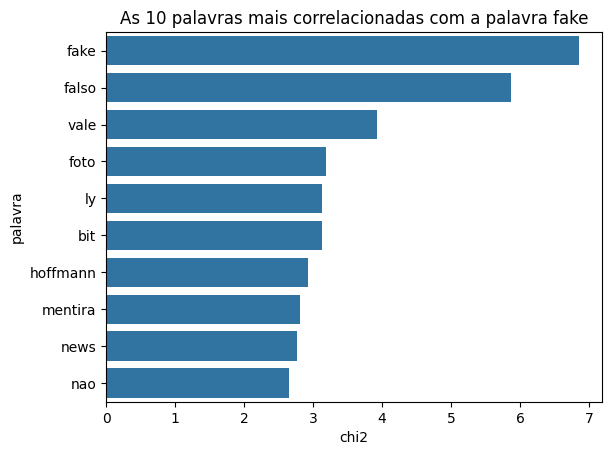

In [28]:
chi2score = chi2(X_tfidf, Y)[0]

df_chi2 = pd.DataFrame(chi2score, columns=['chi2'])
df_chi2['palavra'] = tfidf.get_feature_names_out()
df_chi2 = df_chi2.sort_values(by='chi2', ascending=False)

# plt.figure(figsize=(15,10))
sns.barplot(x='chi2', y='palavra', data=df_chi2.head(10))
plt.title('As 10 palavras mais correlacionadas com a palavra fake')
plt.show()

6. Crie uma arvore (ou floresta) que represente a similaridades entre os textos. A arvore deve ser oriunda de um grafo onde os textos são conectados pela similaridade do cosseno entre eles. Crie uma arvore para cada método.  

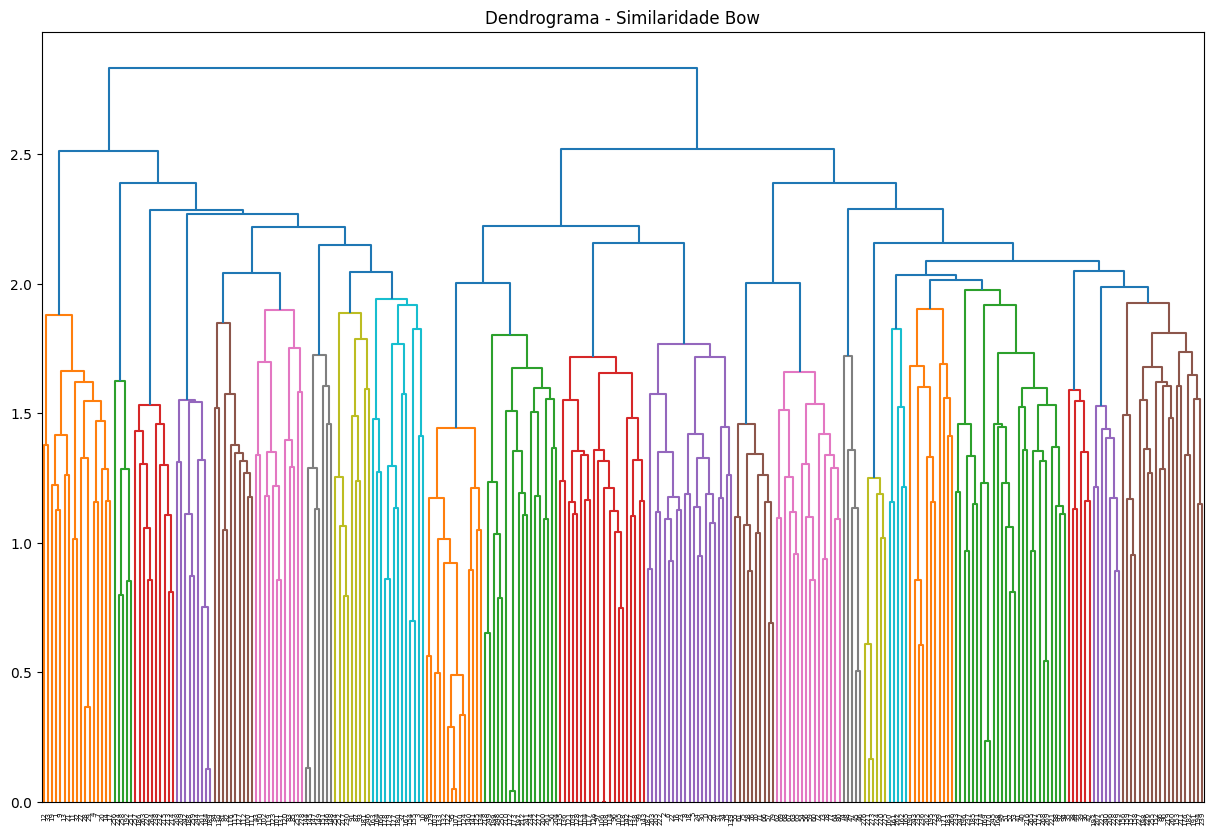

In [31]:
# 6. Crie uma arvore (ou floresta) que represente a similaridades entre os textos. A arvore deve ser oriunda de um grafo onde os textos são conectados pela similaridade do cosseno entre eles. Crie uma arvore para cada método.

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering

similaridade_bow = cosine_similarity(X_bow)

modelo_bow = AgglomerativeClustering(
    n_clusters=2, metric='precomputed', linkage='average')

modelo_bow.fit(similaridade_bow)


Z_bow = linkage(similaridade_bow, method='average')

plt.figure(figsize=(15, 10))
dendrogram(Z_bow)
plt.title('Dendrograma - Similaridade Bow')
plt.show()

In [ ]:

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering

similaridade_tfidf=cosine_similarity(X_tfidf)

modelo_tfidf=AgglomerativeClustering(n_clusters=2,metric='precomputed',linkage='average')

modelo_tfidf.fit(similaridade_tfidf)

from scipy.cluster.hierarchy import dendrogram, linkage

Z_tfidf=linkage(similaridade_tfidf,method='average')

plt.figure(figsize=(15,10))
dendrogram(Z_tfidf)
plt.title('Dendrograma - Similaridade Tfidf')
plt.show()

7. Baseado na questão anterior, responda: O $\textit{closeness centrality}$ entre os métodos são proporcionais? Crie um correlograma para evidenciar a correlação de Pearson entre as centralidades dos textos para cada método. 